Q1. Suppose you want to build Naïve Bayes classifier for predicting whether a
cricket match will be played in the given weather conditions or not. Here the
weather conditions are described by features outlook, temperature, humidity and
wind. The target is play with two class labels Yes and No. (Dataset: play.csv)
a. Implement Naïve Bayes classifier which must
o Print the class prior probabilities form the training set
o Classify the test sample <Rain, Cool, High, Strong>. Need to print
likelihood for <Rain, Cool, High, Strong> and also class
conditional probabilities for “YES” and “NO” classes.
b. Use sklearn CategoricalNB to validate the results obtained above.

In [35]:
from functools import reduce

import pandas as pd
import pprint

class Classifier():
    data = None
    class_attr = None
    priori = {}
    cp = {}
    hypothesis = None


    def __init__(self,filename=None, class_attr=None ):
        self.data = pd.read_csv("play.csv")
        self.class_attr = class_attr

    '''
        probability(class) =    How many  times it appears in cloumn
                             __________________________________________
                                  count of all class attribute
    '''
    def calculate_priori(self):
        class_values = list(set(self.data[self.class_attr]))
        class_data =  list(self.data[self.class_attr])
        for i in class_values:
            self.priori[i]  = class_data.count(i)/float(len(class_data))
        print ("Priori Values: ", self.priori)

    '''
        Here we calculate the individual probabilites
        P(outcome|evidence) =   P(Likelihood of Evidence) x Prior prob of outcome
                               ___________________________________________
                                                    P(Evidence)
    '''
    def get_cp(self, attr, attr_type, class_value):
        data_attr = list(self.data[attr])
        class_data = list(self.data[self.class_attr])
        total =1
        for i in range(0, len(data_attr)):
            if class_data[i] == class_value and data_attr[i] == attr_type:
                total+=1
        return total/float(class_data.count(class_value))

    '''
        Here we calculate Likelihood of Evidence and multiple all individual probabilities with priori
        (Outcome|Multiple Evidence) = P(Evidence1|Outcome) x P(Evidence2|outcome) x ... x P(EvidenceN|outcome) x P(Outcome)
        scaled by P(Multiple Evidence)
    '''
    def calculate_conditional_probabilities(self, hypothesis):
        for i in self.priori:
            self.cp[i] = {}
            for j in hypothesis:
                self.cp[i].update({ hypothesis[j]: self.get_cp(j, hypothesis[j], i)})
        print ("\nCalculated Conditional Probabilities: \n")
        pprint.pprint(self.cp)

    def classify(self):
        print ("Result: ")
        for i in self.cp:
            print (i, " ==> ", reduce(lambda x, y: x*y, self.cp[i].values())*self.priori[i])

if __name__ == "__main__":
    c = Classifier(filename="play.csv", class_attr="play" )
    c.calculate_priori()
    c.hypothesis = {"outlook":'Rain', "temp":"Mild", "humidity":'Normal' , "wind":'Strong'}

    c.calculate_conditional_probabilities(c.hypothesis)
    c.classify()

Priori Values:  {'No': 0.35714285714285715, 'Yes': 0.6428571428571429}

Calculated Conditional Probabilities: 

{'No': {'Mild': 0.6, 'Normal': 0.4, 'Rain': 0.6, 'Strong': 0.8},
 'Yes': {'Mild': 0.5555555555555556,
         'Normal': 0.7777777777777778,
         'Rain': 0.4444444444444444,
         'Strong': 0.4444444444444444}}
Result: 
No  ==>  0.04114285714285714
Yes  ==>  0.05486968449931413


Q2. Assume you need to build a classifier to predict the graduate admissions into
global universities for higher studies using parameters such as UG GPA, GRE
score, research expertise, etc. Using the graduate.csv dataset, build a naïve bayes
classifier to predict the graduate admissions chances. Report accuracy.

In [38]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Graduate.csv')

# Split the dataset into features and target
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print(f"The accuracy of the Naïve Bayes classifier is: {accuracy:.2f}")

The accuracy of the Naïve Bayes classifier is: 0.89


Q3. Apply K-NN for the graduate admissions problem. Compare accuracy of K-NN for different values of K.

In [40]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Graduate.csv')

# Split the dataset into features and target
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Define the range of k values to test
k_values = range(1, 21)

# Train and test the K-NN classifier for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")


Accuracy for k=1: 0.93
Accuracy for k=2: 0.92
Accuracy for k=3: 0.93
Accuracy for k=4: 0.93
Accuracy for k=5: 0.93
Accuracy for k=6: 0.93
Accuracy for k=7: 0.93
Accuracy for k=8: 0.93
Accuracy for k=9: 0.91
Accuracy for k=10: 0.91
Accuracy for k=11: 0.91
Accuracy for k=12: 0.91
Accuracy for k=13: 0.91
Accuracy for k=14: 0.91
Accuracy for k=15: 0.91
Accuracy for k=16: 0.91
Accuracy for k=17: 0.91
Accuracy for k=18: 0.91
Accuracy for k=19: 0.91
Accuracy for k=20: 0.91


Q4. Plot the bar chart for target variable in graduate.csv. You may observe the
class imbalance (ie. Class=1 more than Class=0). You may address this problem
either by data augmentation (to create dummy samples for Class=0) or SMOTE
algorithm for imbalance.

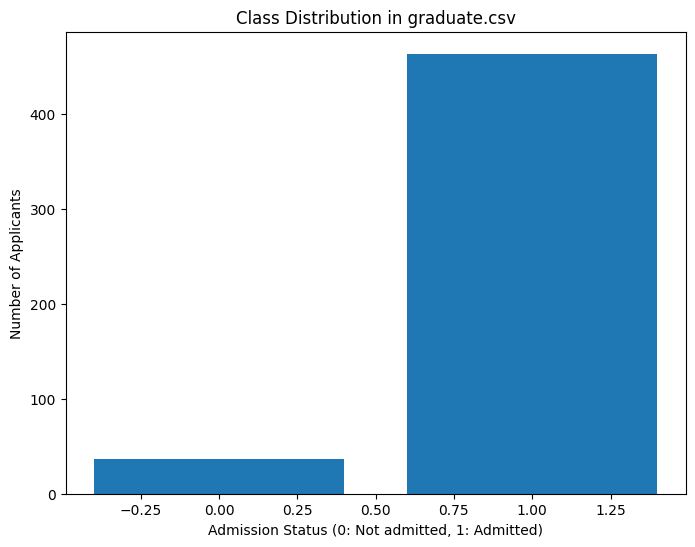


Model: GaussianNB
Original dataset evaluation:
F1-score: 0.9243119266055045
Precision: 0.9853300733496333
Recall: 0.8704103671706264
AUC-ROC: 0.8541241025042321
Resampled dataset evaluation:
F1-score: 0.8886363636363637
Precision: 0.9376498800959233
Recall: 0.8444924406047516
AUC-ROC: 0.8941684665226782

Model: MultinomialNB
Original dataset evaluation:
F1-score: 0.7361477572559366
Precision: 0.9457627118644067
Recall: 0.6025917926565875
AUC-ROC: 0.5850796801120774
Resampled dataset evaluation:
F1-score: 0.5686695278969958
Precision: 0.5650319829424307
Recall: 0.572354211663067
AUC-ROC: 0.5658747300215983

Model: KNeighborsClassifier
Original dataset evaluation:
F1-score: 0.9776357827476038
Precision: 0.9642857142857143
Recall: 0.9913606911447084
AUC-ROC: 0.7659506158426245
Resampled dataset evaluation:
F1-score: 0.9478357380688124
Precision: 0.9748858447488584
Recall: 0.9222462203023758
AUC-ROC: 0.949244060475162


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Load the dataset
data = pd.read_csv("Graduate.csv")

# Visualize class imbalance
class_counts = data["Admit"].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Admission Status (0: Not admitted, 1: Admitted)")
plt.ylabel("Number of Applicants")
plt.title("Class Distribution in graduate.csv")
plt.show()

# Separate features and target
X = data.drop("Admit", axis=1)
y = data["Admit"]

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train Naive Bayes and KNN models on both original and resampled datasets
models = [GaussianNB(), MultinomialNB(), KNeighborsClassifier()]
for model in models:
    model_name = model.__class__.__name__
    print(f"\nModel: {model_name}")

    # Train on original dataset
    model.fit(X, y)
    original_y_pred = model.predict(X)
    print(f"Original dataset evaluation:")
    print(f"F1-score: {f1_score(y, original_y_pred)}")
    print(f"Precision: {precision_score(y, original_y_pred)}")
    print(f"Recall: {recall_score(y, original_y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y, original_y_pred)}")

    # Train on resampled dataset
    model.fit(X_resampled, y_resampled)
    resampled_y_pred = model.predict(X_resampled)
    print(f"Resampled dataset evaluation:")
    print(f"F1-score: {f1_score(y_resampled, resampled_y_pred)}")
    print(f"Precision: {precision_score(y_resampled, resampled_y_pred)}")
    print(f"Recall: {recall_score(y_resampled, resampled_y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_resampled, resampled_y_pred)}")
